# Python Introduction

Python is a very powerful tool for automating tasks that would otherwise be time-consuming or impossible to do by hand or other conventional tools and techniques. Here, we'll go over basic ways to use Python for data analysis to introduce you to a slice of its potential.

## Markdown

We are working in a **Jupyter Notebook**. This lets us have descriptive text in Markdown as well running analysis in Python code. You can highlight text in **bold** or *italics*.

For more on Markdown, check out [this cheatsheet](https://www.markdownguide.org/cheat-sheet/).


## Code Block

Jupyter notebooks allow code to be run in blocks (also called chunks). Lines are run top to bottom. You can always edit a code block and re-run it to make changes.

In [1]:
#  INSTRUCTIONS:   Write a message in the quotes.
#  type Shift+Enter to run the cell.
message = ''

print(message)

## Python as a calculator

An incredibly simple yet pivotal role of Python is to perform math calculations (addition, subtraction, multiplication, etc.). We show how to do basic math below.

You'll see the symbol `#` used often. These are comments, and they are used to write descriptions. Any characters following `#` are not run or executed.

In [3]:
3 + 4 * 5  # addition and multiplication 

23

In [4]:
12 / (6 - 4) # division and substraction

6.0

In [5]:
2 ** 3 # exponentiation

8

#### Question 1: Math
Calculate the following value in Python: $ \frac{25}{(35 - 3)^3} $

In [56]:
### Put your code below here:


## Assigning Variables
A foundational tool in Python is assigning values to variables. We do this with the `=` operator.

In [6]:
x = 50 # x is 50

This sets the variable `x` to be 50, an **integer**, or `int`. This value of x is now stored in our notebook, and we can access this value in other cells until the notebook is reset. For instance, subtracting 20 from `x` prints out a value of 30.

In [7]:
# What if I use x again in a different cell?
x - 20

30

**Variables persist between cells once they have been run (executed).**

If we ever want to check the value of any variable, we can use the built-in `print()` command to display the value. 

In [8]:
y = 35
print(y)

35


We can also assign the value of one variable to another variable. If we execute `x = y`, x takes the current value of `y` and assigns that to `x`.

*Note: `y` will be unaffected by this assignment. `x = y` should be interpretted as "let x take the current value of y".*

In [9]:
x = y
print(x)
print(y)

35
35


If we change `y` to be a different value, `x` will be unaffected.

In [10]:
y = 3.8
print(x) # will not always be the same value as y
print(y)

35
3.8


**Basic variables only change value when something is assigned to them.**
They are **not** like spreadsheets where a cell can depend on another and update automatically.

Variables can be integers, floats (numbers with decimals), and strings (sets of characters). Strings must be specified with double quotes or single quotes.

In [11]:
a = 52 # integer
b = 3.14 # float
c = 'Inigo Montoya' # string

#### Question 2.  Swapping Values
Given the code below, what is the value of the variable `swap` by the end of the block?

In [ ]:
x = 1.0
y = 3.0
swap = x
x = y
y = swap 

**What's in a name?** _Variable name conventions_
- Use only letters, digits, and underscores _
- Start with a letter (typically lower case)
- Variable names are case sensitive
- Use meaningful names!

**Variables must be created before they are used.** Otherwise, Python will throw an error.

## Read in data

### Import libraries

To analyze data, we first read it into our environment. This is done using **external libraries**, collections of functions and useful tools that are not in Python by default. We can easily include these using `import`. The library we need first is called `pandas`, which is used for importing and interacting with tabular data. 

In [1]:
import pandas as pd  

Using `as pd` allows us to reference `pandas` with only typing `pd`.

With `pandas` imported, we can read in .csv files with the `pandas` function `read_csv()`.

In that function, we can specify the file we want to use with a URL or with the path to a local file as a string.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DeisData/python/master/data/gapminder.csv") # read in data

Our data is now saved as a data frame in Python as the variable `df`. With the data now in the environment, we can take a look at the first few rows with `df.head()`.

In [14]:
df.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


We can see that this data frame has several different columns, with information about countries and demography.

## Summarize data frame

It is important to understand the data we are working with before we begin analysis. First, let's look at the dimenions of the data frame using `df.shape`. It gives the number of rows by the number of columns.

In [15]:
df.shape


(14740, 9)

This shows that our data frame has 14740 rows by 9 columns.

We can also use `df.columns` to display the column names.

In [16]:
df.columns

Index(['country', 'year', 'region', 'population', 'life_expectancy',
       'age5_surviving', 'babies_per_woman', 'gdp_per_capita', 'gdp_per_day'],
      dtype='object')

### Categorical variables
Next, let's summarize the categorical, non-numerical variables. For instance, we can identify how many unique regions we have in the data set.

First, to select a column, we use the notation `df['COLUMN_NAME']`.

In [17]:
df['region']

0          Asia
1          Asia
2          Asia
3          Asia
4          Asia
          ...  
14735    Africa
14736    Africa
14737    Africa
14738    Africa
14739    Africa
Name: region, Length: 14740, dtype: object

To identify unique entries in this column, we can use the `pd.unique()` function. 

In [29]:
pd.unique( df['region'] )

array(['Asia', 'Europe', 'Africa', 'America'], dtype=object)

The `countries` column has many unique values, so we'll just use the `len()` function to see how many unique countries we have.

In [57]:
len( pd.unique( df['country'] ) ) # this is called nesting functions -> calling functions within other functions

182

### Numerical variables

Numerical columns can be summarized in several ways. Let's find the mean first.

To make things simpler, we'll just do calculations on the `population`, `life_expectancy`, and `babies_per_woman` columns. We can put those names in an arrangement called a`list` and then specify that list for the columns.

In [20]:
num_cols = [ 'population', 'life_expectancy', 'babies_per_woman' ] # numerical columns

df[num_cols]

,population,life_expectancy,babies_per_woman
0,3280000.0,28.21,7.00
1,3280000.0,28.11,7.00
2,3323519.0,28.01,7.00
3,3448982.0,27.90,7.00
4,3625022.0,27.80,7.00
...,...,...,...
14735,14255592.0,51.60,3.64
14736,14565482.0,54.20,3.56
14737,14898092.0,55.70,3.49
14738,15245855.0,57.00,3.41


With this set of columns, we can run `.mean()` to find the mean of each column.

In [21]:
df[num_cols].mean() # returns the mean of each column

population          2.252933e+07
life_expectancy     5.683453e+01
babies_per_woman    4.643472e+00
dtype: float64

If we want a larger variety of summary statistics, we can use the `.describe()` method.

In [31]:
df[num_cols].describe()

,population,life_expectancy,babies_per_woman
count,1.474000e+04,14740.000000,14740.000000
mean,2.252933e+07,56.834526,4.643472
std,9.307143e+07,15.868464,1.994833
min,2.128000e+03,4.000000,1.130000
25%,8.990308e+05,44.230000,2.630000
50%,4.063978e+06,60.080000,5.060000
75%,1.218722e+07,70.380000,6.440000
max,1.376049e+09,83.300000,9.220000


We can also break down subgroupings of our data with the method `.groupby()`.

In [35]:
grouped_data = df.groupby('region')
grouped_data['population'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Africa,4293.0,9.181313e+06,1.655128e+07,12522.0,996331.00,3457113.0,9901052.00,1.822020e+08
America,2673.0,1.667833e+07,4.411806e+07,24000.0,331799.00,2843246.0,10061519.00,3.217736e+08
Asia,4212.0,4.604245e+07,1.658010e+08,2128.0,512028.25,4011309.5,19517390.25,1.376049e+09
Europe,3562.0,1.520351e+07,2.463153e+07,61428.0,2308682.00,5186801.5,10638884.75,1.484358e+08


### Accessing rows and specific entries

You can also to access a specific row using `df.loc[ROW, :]`. The colon specifies to select all columns for that row number.

In [53]:
df.loc[0, :] # the first row

country             Afghanistan
year                       1800
region                     Asia
population            3280000.0
life_expectancy           28.21
age5_surviving           53.142
babies_per_woman            7.0
gdp_per_capita            603.0
gdp_per_day            1.650924
life_difference          24.932
Name: 0, dtype: object

We can use `.loc` to find the value of specific entries, as well.

In [54]:
df.loc[0, 'country']

'Afghanistan'

#### Question 3. Data Summary
Print out the summary statistics for columns `age5_surviving`, `gdp_per_day`, and `gdp_per_capita`.

In [ ]:
### your code below:


## Manipulate data 

### Subset by row

Sometimes, we want to create a subset of the main data frame based on certain conditions. We do this by using `df.loc` and specifying a condition for the rows. 

Below, we take all of the rows where `babies_per_woman` is greater or equal to 4 with `df['babies_per_woman'] >= 4` and assign this to a new data frame.

To check that this was done correctly, we can look at the minimum of the `babies_per_woman` column in the new data frame with  `.min()`.

In [43]:
# take all rows where babies_per_woman is greater or equal to 4 and make a new data frame
df_4 = df.loc[df['babies_per_woman'] >= 4, :]
df_4['babies_per_woman'].min()

4.0

We can also subset with categorical variables. Here, we take all rows where the country is Hungary. 

In [55]:
df_hungary = df.loc[df['country'] == 'Hungary', :]
pd.unique(df_hungary['country'])

array(['Hungary'], dtype=object)

### Math

If we multiply a data frame by a single number, each value in the column will be muliplied by that value.

In [23]:
df['babies_per_woman'] * 1000

0        7000.0
1        7000.0
2        7000.0
3        7000.0
4        7000.0
          ...  
14735    3640.0
14736    3560.0
14737    3490.0
14738    3410.0
14739    3350.0
Name: babies_per_woman, Length: 14740, dtype: float64

We can also do math between columns, since they have the same length. Elements of the same row are added, substacted, multiplied, or divided. 

Here, we subtract the `life_expectancy` column from the `age5_surviving` column and assign it to a new column called `life_difference`. 

In [24]:
df['life_difference'] = df['age5_surviving'] - df['life_expectancy'] 
print(df['life_difference'])

0        24.932
1        24.892
2        24.852
3        24.819
4        24.776
          ...  
14735    39.200
14736    37.130
14737    35.970
14738    34.900
14739    32.740
Name: life_difference, Length: 14740, dtype: float64


This new column is now reflected in the data frame. 

In [25]:
print(df.columns)

Index(['country', 'year', 'region', 'population', 'life_expectancy',
       'age5_surviving', 'babies_per_woman', 'gdp_per_capita', 'gdp_per_day',
       'life_difference'],
      dtype='object')


#### Question 4. Subsetting 

Create a subset of data from Lithuania. 

Within that subset, calculate the mean GDP per 1000 people across entries.

*Hint: Multiply per capita GDP by 1000.*

In [61]:
### your code below




12087740.74074074

## Simple plotting

Now that we understand how to work with data frames a bit more, we can start to make some basic data visualizations. To do this we will use the `matplotlib` library, specifically a set of functions in a module called `pyplot`. 

In [26]:
import matplotlib.pyplot as plt

First, let's make a histogram showing the overall distribution of life expectancy. 

To do this, we initialize a blank figure and set of axes with `plt.subplots()`. 

We then directly add the histogram to the axes with `ax.hist()`, being sure to specify the life expectancy column. 

Finally, we can display the figure with `plt.show()`

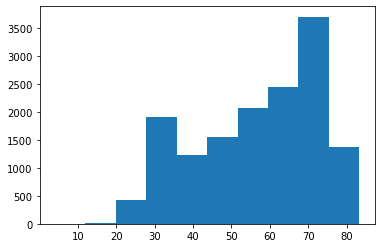

In [46]:
figure, ax = plt.subplots() # create blank figure and axes
ax.hist(df['life_expectancy']) # add histogram to axes with 30 bins
plt.show() # display figure

We also have many customibility options. For the histogram itself, we can specify the number of bins, the color of the bins, and color of the bin edges within `hist()`.

We can also specify axis labels with `ax.set_xlabel()` and `ax.set_ylabel()`. The plot title is set with `ax.set_title()`.



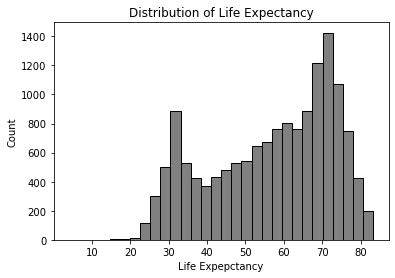

In [50]:
figure, ax = plt.subplots()
ax.hist(df['life_expectancy'],bins=30, color="grey", edgecolor='black') # specify bins, color, and edge color
ax.set_xlabel('Life Expepctancy') # x axis label
ax.set_ylabel('Count') # y axis planning
ax.set_title('Distribution of Life Expectancy') # add title
plt.show()

There are many more axis and plot customizations you can do. Be sure check out [the `matplotlib` documentation](https://matplotlib.org/).

### Line Plot

Line plots are another simple visualization we can make through `matplotlib`.

Let's a plot of life expectancy in Jamaica over time. First, we need to subset the data frame to only include data from Jamaica.

Then, we make a plot just as we did before, but instead of using `ax.hist()`, we use `ax.plot(x, y)`, putting the year first to specify the x axis, followed by life expectancy for the y. 

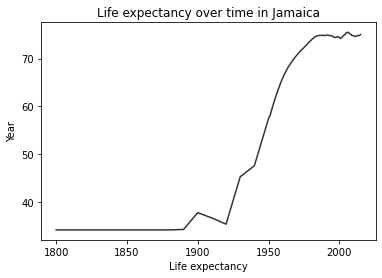

In [49]:
# subset data
df_jm = df.loc[ df['country']=='Jamaica', :]
# create plot
figure, ax = plt.subplots()
ax.plot(df_jm['year'], df_jm['life_expectancy'], color='#333') # a dark charcoal
ax.set_xlabel('Life expectancy')
ax.set_ylabel('Year')
ax.set_title('Life expectancy over time in Jamaica')
plt.show()

#### Question 5: Putting it together

Plot a line plot of the average birth's per woman in Greece by the year, only including years after 1900. Label the axes and make a title.

In [ ]:
### your code here:

## Resources

- [Official Python documentation](https://www.python.org/doc/)
- Take time with tutorials at [Kaggle.com](https://www.kaggle.com/learn)
- [Brandeis LinkedIn Learning portal](https://www.brandeis.edu/its/support/linkedin-learning/index.html)
- [Stack Overflow](https://stackoverflow.com/)
- [Getting started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
- [Pandas cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- Data Visualization: [Python Graph Gallery](https://www.python-graph-gallery.com/)
- Other visualization libraries: [Seaborn](https://seaborn.pydata.org/tutorial.htmls), [Plotly](https://plotly.com/python/)
- Install Python: [Anaconda](https://docs.anaconda.com/anaconda/install/)

This lesson is adapted from 
<a href='http://swcarpentry.github.io/python-novice-gapminder/design/'>Software Carpentry.</a>

## Contact
Ford Fishman<br>
Data Analysis Specialist for Science<br>
Brandeis Library<br>
[fordfishman@brandeis.edu](fordfishman@brandeis.edu)<br>
[dataservices@brandeis.edu](dataservices@brandeis.edu)<br>
[Set up an appointment](https://calendar.library.brandeis.edu/appointments/fordfishman)